In [15]:
import requests 
from bs4 import BeautifulSoup as bs 
import re 
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np 
import string 
import spacy 
from nltk import tokenize
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'spacy'

### 1) Importing Reviews

In [3]:
iphone13_reviews=[]


for i in range(1,20):
  ip=[]  

url = 'https://www.amazon.in/Apple-iPhone-Pro-Max-128GB/product-reviews/B09G9HR5GX'
response = requests.get(url)
soup = bs(response.content,"html.parser")
reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
for i in range(len(reviews)):
    ip.append(reviews[i].text)  
    iphone13_reviews=iphone13_reviews+ip
with open("iphone13.txt","w",encoding='utf8') as output:
    output.write(str(iphone13_reviews))

In [4]:
df=iphone13_reviews

In [5]:
df

['\ni was completely satisfied with amazons delivery, it was safe. the phone is amazing\n',
 '\ni was completely satisfied with amazons delivery, it was safe. the phone is amazing\n',
 '\nI have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones. Camera quality you can’t even think of comparing it with any other phone in the world. You definitely don’t need to carry a FSLR or a video cam after you own this piece. You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it.\n',
 '\ni was completely satisfied with amazons delivery, it was safe. the phone is amazing\n',
 '\nI have started using iPhone 

### 2) Lets remove trailing and leading characters along with empty strings

In [6]:
df = [y.strip() for y in df]
df

['i was completely satisfied with amazons delivery, it was safe. the phone is amazing',
 'i was completely satisfied with amazons delivery, it was safe. the phone is amazing',
 'I have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones. Camera quality you can’t even think of comparing it with any other phone in the world. You definitely don’t need to carry a FSLR or a video cam after you own this piece. You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it.',
 'i was completely satisfied with amazons delivery, it was safe. the phone is amazing',
 'I have started using iPhone from 5 series and 

In [7]:
df = [x for x in df if x] 
df

['i was completely satisfied with amazons delivery, it was safe. the phone is amazing',
 'i was completely satisfied with amazons delivery, it was safe. the phone is amazing',
 'I have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones. Camera quality you can’t even think of comparing it with any other phone in the world. You definitely don’t need to carry a FSLR or a video cam after you own this piece. You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it.',
 'i was completely satisfied with amazons delivery, it was safe. the phone is amazing',
 'I have started using iPhone from 5 series and 

### 3) Lets Join the list into one string

In [8]:
df1 = ' '.join(df)
df1

"i was completely satisfied with amazons delivery, it was safe. the phone is amazing i was completely satisfied with amazons delivery, it was safe. the phone is amazing I have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones. Camera quality you can’t even think of comparing it with any other phone in the world. You definitely don’t need to carry a FSLR or a video cam after you own this piece. You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it. i was completely satisfied with amazons delivery, it was safe. the phone is amazing I have started using iPhone from 5 series and since then this i

In [9]:
df2 = df1.translate(str.maketrans("", "", string.punctuation)) 
df2

'i was completely satisfied with amazons delivery it was safe the phone is amazing i was completely satisfied with amazons delivery it was safe the phone is amazing I have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones Camera quality you can’t even think of comparing it with any other phone in the world You definitely don’t need to carry a FSLR or a video cam after you own this piece You can literally make a professional movie from its cameraThe only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the bestMy suggestion is go for it only if you have the capacity to own it i was completely satisfied with amazons delivery it was safe the phone is amazing I have started using iPhone from 5 series and since then this is 7th iPhone

### 4) Lets Perform Tokenization

In [10]:
df1_tokens = word_tokenize(df2)
df1_tokens

NameError: name 'word_tokenize' is not defined

In [11]:
df1_tokens[0:50]

NameError: name 'df1_tokens' is not defined

In [12]:
len(df1_tokens)

NameError: name 'df1_tokens' is not defined

In [13]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [216]:
no_stop_tokens = [word for word in df1_tokens if not word in stop_words]
print(no_stop_tokens[0:50])

['completely', 'satisfied', 'amazons', 'delivery', 'safe', 'phone', 'amazing', 'completely', 'satisfied', 'amazons', 'delivery', 'safe', 'phone', 'amazing', 'I', 'started', 'using', 'iPhone', '5', 'series', 'since', '7th', 'iPhone', 'I', 'upgrade', 'I', 'must', 'say', 'till', 'date', 'got', 'best', 'battery', 'I', 'observed', 'previous', 'iPhones', 'Camera', 'quality', '’', 'even', 'think', 'comparing', 'phone', 'world', 'You', 'definitely', '’', 'need', 'carry']


### 5) Lets normalize the data

In [217]:
df2= [x.lower() for x in no_stop_tokens]
print(df2[0:50])

['completely', 'satisfied', 'amazons', 'delivery', 'safe', 'phone', 'amazing', 'completely', 'satisfied', 'amazons', 'delivery', 'safe', 'phone', 'amazing', 'i', 'started', 'using', 'iphone', '5', 'series', 'since', '7th', 'iphone', 'i', 'upgrade', 'i', 'must', 'say', 'till', 'date', 'got', 'best', 'battery', 'i', 'observed', 'previous', 'iphones', 'camera', 'quality', '’', 'even', 'think', 'comparing', 'phone', 'world', 'you', 'definitely', '’', 'need', 'carry']


### 6) Stemming

In [218]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
df2_tokens = [ps.stem(word) for word in df2]
print(df2_tokens[0:50])

['complet', 'satisfi', 'amazon', 'deliveri', 'safe', 'phone', 'amaz', 'complet', 'satisfi', 'amazon', 'deliveri', 'safe', 'phone', 'amaz', 'i', 'start', 'use', 'iphon', '5', 'seri', 'sinc', '7th', 'iphon', 'i', 'upgrad', 'i', 'must', 'say', 'till', 'date', 'got', 'best', 'batteri', 'i', 'observ', 'previou', 'iphon', 'camera', 'qualiti', '’', 'even', 'think', 'compar', 'phone', 'world', 'you', 'definit', '’', 'need', 'carri']


### 7) Natural Langage Processing

In [219]:
nlp = spacy.load('en_core_web_sm')

In [220]:
df3= nlp(' '.join(no_stop_tokens))
print(df3[0:50])

completely satisfied amazons delivery safe phone amazing completely satisfied amazons delivery safe phone amazing I started using iPhone 5 series since 7th iPhone I upgrade I must say till date got best battery I observed previous iPhones Camera quality ’ even think comparing phone world You definitely ’ need carry


In [221]:
lemmas = [token.lemma_ for token in df3]
print(lemmas[0:25])

['completely', 'satisfied', 'amazon', 'delivery', 'safe', 'phone', 'amazing', 'completely', 'satisfied', 'amazon', 'delivery', 'safe', 'phone', 'amazing', 'I', 'start', 'use', 'iPhone', '5', 'series', 'since', '7th', 'iPhone', 'I', 'upgrade']


### 8) Performing Feature Extraction

In [222]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(lemmas)

In [223]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

,completely,satisfied,amazon,delivery,safe,phone,amazing,start,use,iphone,...,beatprosbest,phonesuperior,performancecinematic,modebrighter,displayexcellent,lifeconscould,chargingcinematic,mode,cap,1080p
0,60,195,15,67,193,168,14,215,242,119,...,30,169,166,139,72,126,50,138,43,0


In [224]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(25)

,0
1080p,0
12,1
120hz,2
13,3
14,4
155,5
1st,6
30,7
512,8
6000,9


In [225]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

,0
completely,60
satisfied,195
amazon,15
delivery,67
safe,193
...,...
lifeconscould,126
chargingcinematic,50
mode,138
cap,43


In [226]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(25)

,0
you,260
would,259
world,258
work,257
with,256
wise,255
when,254
whatsapp,253
well,252
week,251


In [227]:
print(vectorizer.vocabulary_)

{'completely': 60, 'satisfied': 195, 'amazon': 15, 'delivery': 67, 'safe': 193, 'phone': 168, 'amazing': 14, 'start': 215, 'use': 242, 'iphone': 119, 'series': 202, 'since': 205, '7th': 10, 'upgrade': 240, 'must': 143, 'say': 196, 'till': 232, 'date': 63, 'get': 96, 'good': 99, 'battery': 27, 'observe': 154, 'previous': 175, 'iphones': 120, 'camera': 41, 'quality': 183, 'even': 79, 'think': 230, 'compare': 58, 'world': 258, 'you': 260, 'definitely': 65, 'need': 144, 'carry': 45, 'fslr': 90, 'video': 247, 'cam': 40, 'piece': 171, 'literally': 129, 'make': 135, 'professional': 180, 'movie': 141, 'camerathe': 42, 'thing': 229, 'shell': 203, 'hell': 109, 'lot': 132, 'money': 140, 'owner': 161, 'beauty': 32, 'end': 78, 'give': 97, 'satisfaction': 194, 'nothing': 151, 'else': 77, 'bestmy': 35, 'suggestion': 221, 'go': 98, 'capacity': 44, '1st': 6, 'look': 131, 'very': 246, 'feel': 86, 'premium': 174, 'hold': 112, 'ita': 122, 'refresh': 191, 'rate': 185, '120hz': 2, '13': 3, 'pro': 177, 'max'

In [228]:
print(x.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [229]:
print(x.toarray().shape)

(2516, 261)


In [230]:
print(vectorizer.get_feature_names_out()[50:100])

['chargingcinematic' 'check' 'color' 'combination' 'comment'
 'commentsjust' 'commentsthose' 'comparatively' 'compare' 'compile'
 'completely' 'conspros1' 'could' 'date' 'day' 'definitely' 'deliver'
 'delivery' 'demand' 'different' 'digital' 'display' 'displayexcellent'
 'doubt' 'drain' 'drop' 'due' 'else' 'end' 'even' 'ever' 'excellent'
 'experience' 'face' 'fast' 'feature' 'feel' 'feeling' 'find' 'first'
 'fslr' 'fully' 'gaming' 'gb' 'genuine' 'genuineness' 'get' 'give' 'go'
 'good']


### 9) Lets try and include bi and tri grams

In [231]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,4),max_features = 100)
df4= vectorizer_ngram_range.fit_transform(df)
df4

<55x100 sparse matrix of type '<class 'numpy.int64'>'
	with 1952 stored elements in Compressed Sparse Row format>

In [232]:
print(vectorizer_ngram_range.get_feature_names_out())

['120hz' '13' '13 pro' '13 pro max' '14' '14 pro' '1st' 'about' 'all'
 'also' 'and' 'android' 'any' 'apple' 'are' 'as' 'at' 'at the' 'battery'
 'battery life' 'because' 'best' 'but' 'camera' 'camera quality' 'can'
 'don' 'even' 'feel' 'first' 'for' 'for it' 'from' 'go' 'go for'
 'go for it' 'good' 'got' 'got the' 'has' 'have' 'if' 'in' 'iphone'
 'iphone 14' 'iphone 14 pro' 'is' 'is just' 'is that' 'it' 'it was' 'just'
 'life' 'max' 'money' 'more' 'my' 'need' 'need to' 'no' 'not' 'of'
 'of money' 'of the' 'on' 'only' 'other' 'own' 'phone' 'phone and'
 'phone is' 'premium' 'pro' 'pro max' 'purchased' 'quality' 'really'
 'refresh' 'sell' 'smooth' 'so' 'that' 'the' 'the best' 'then' 'thing'
 'this' 'this is' 'to' 'to the' 'up' 'using' 'very' 'very good' 'was'
 'which' 'with' 'you' 'you can' 'you own']


In [233]:
print(df4.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 9 2 2]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


#### TFidf vectorizer

In [234]:
vectorizer_n_gram2 = TfidfVectorizer(norm="l1",analyzer='word',ngram_range=(1,4),max_features = 100)
tf_idf_matrix_n_gram= vectorizer_n_gram2.fit_transform(df)

In [235]:
print(vectorizer_n_gram2.get_feature_names_out())

['120hz' '13' '13 pro' '13 pro max' '14' '14 pro' '1st' 'about' 'all'
 'also' 'and' 'android' 'any' 'apple' 'are' 'as' 'at' 'at the' 'battery'
 'battery life' 'because' 'best' 'but' 'camera' 'camera quality' 'can'
 'don' 'even' 'feel' 'first' 'for' 'for it' 'from' 'go' 'go for'
 'go for it' 'good' 'got' 'got the' 'has' 'have' 'if' 'in' 'iphone'
 'iphone 14' 'iphone 14 pro' 'is' 'is just' 'is that' 'it' 'it was' 'just'
 'life' 'max' 'money' 'more' 'my' 'need' 'need to' 'no' 'not' 'of'
 'of money' 'of the' 'on' 'only' 'other' 'own' 'phone' 'phone and'
 'phone is' 'premium' 'pro' 'pro max' 'purchased' 'quality' 'really'
 'refresh' 'sell' 'smooth' 'so' 'that' 'the' 'the best' 'then' 'thing'
 'this' 'this is' 'to' 'to the' 'up' 'using' 'very' 'very good' 'was'
 'which' 'with' 'you' 'you can' 'you own']


In [236]:
print(tf_idf_matrix_n_gram.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.08949428 0.02425277 0.02931273]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.04477683 0.03937176 0.03937176 ... 0.         0.         0.        ]]


### 10) Preparing Wordcloud

In [237]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(60, 40))    
    plt.imshow(wordcloud)       
    plt.axis("off")      

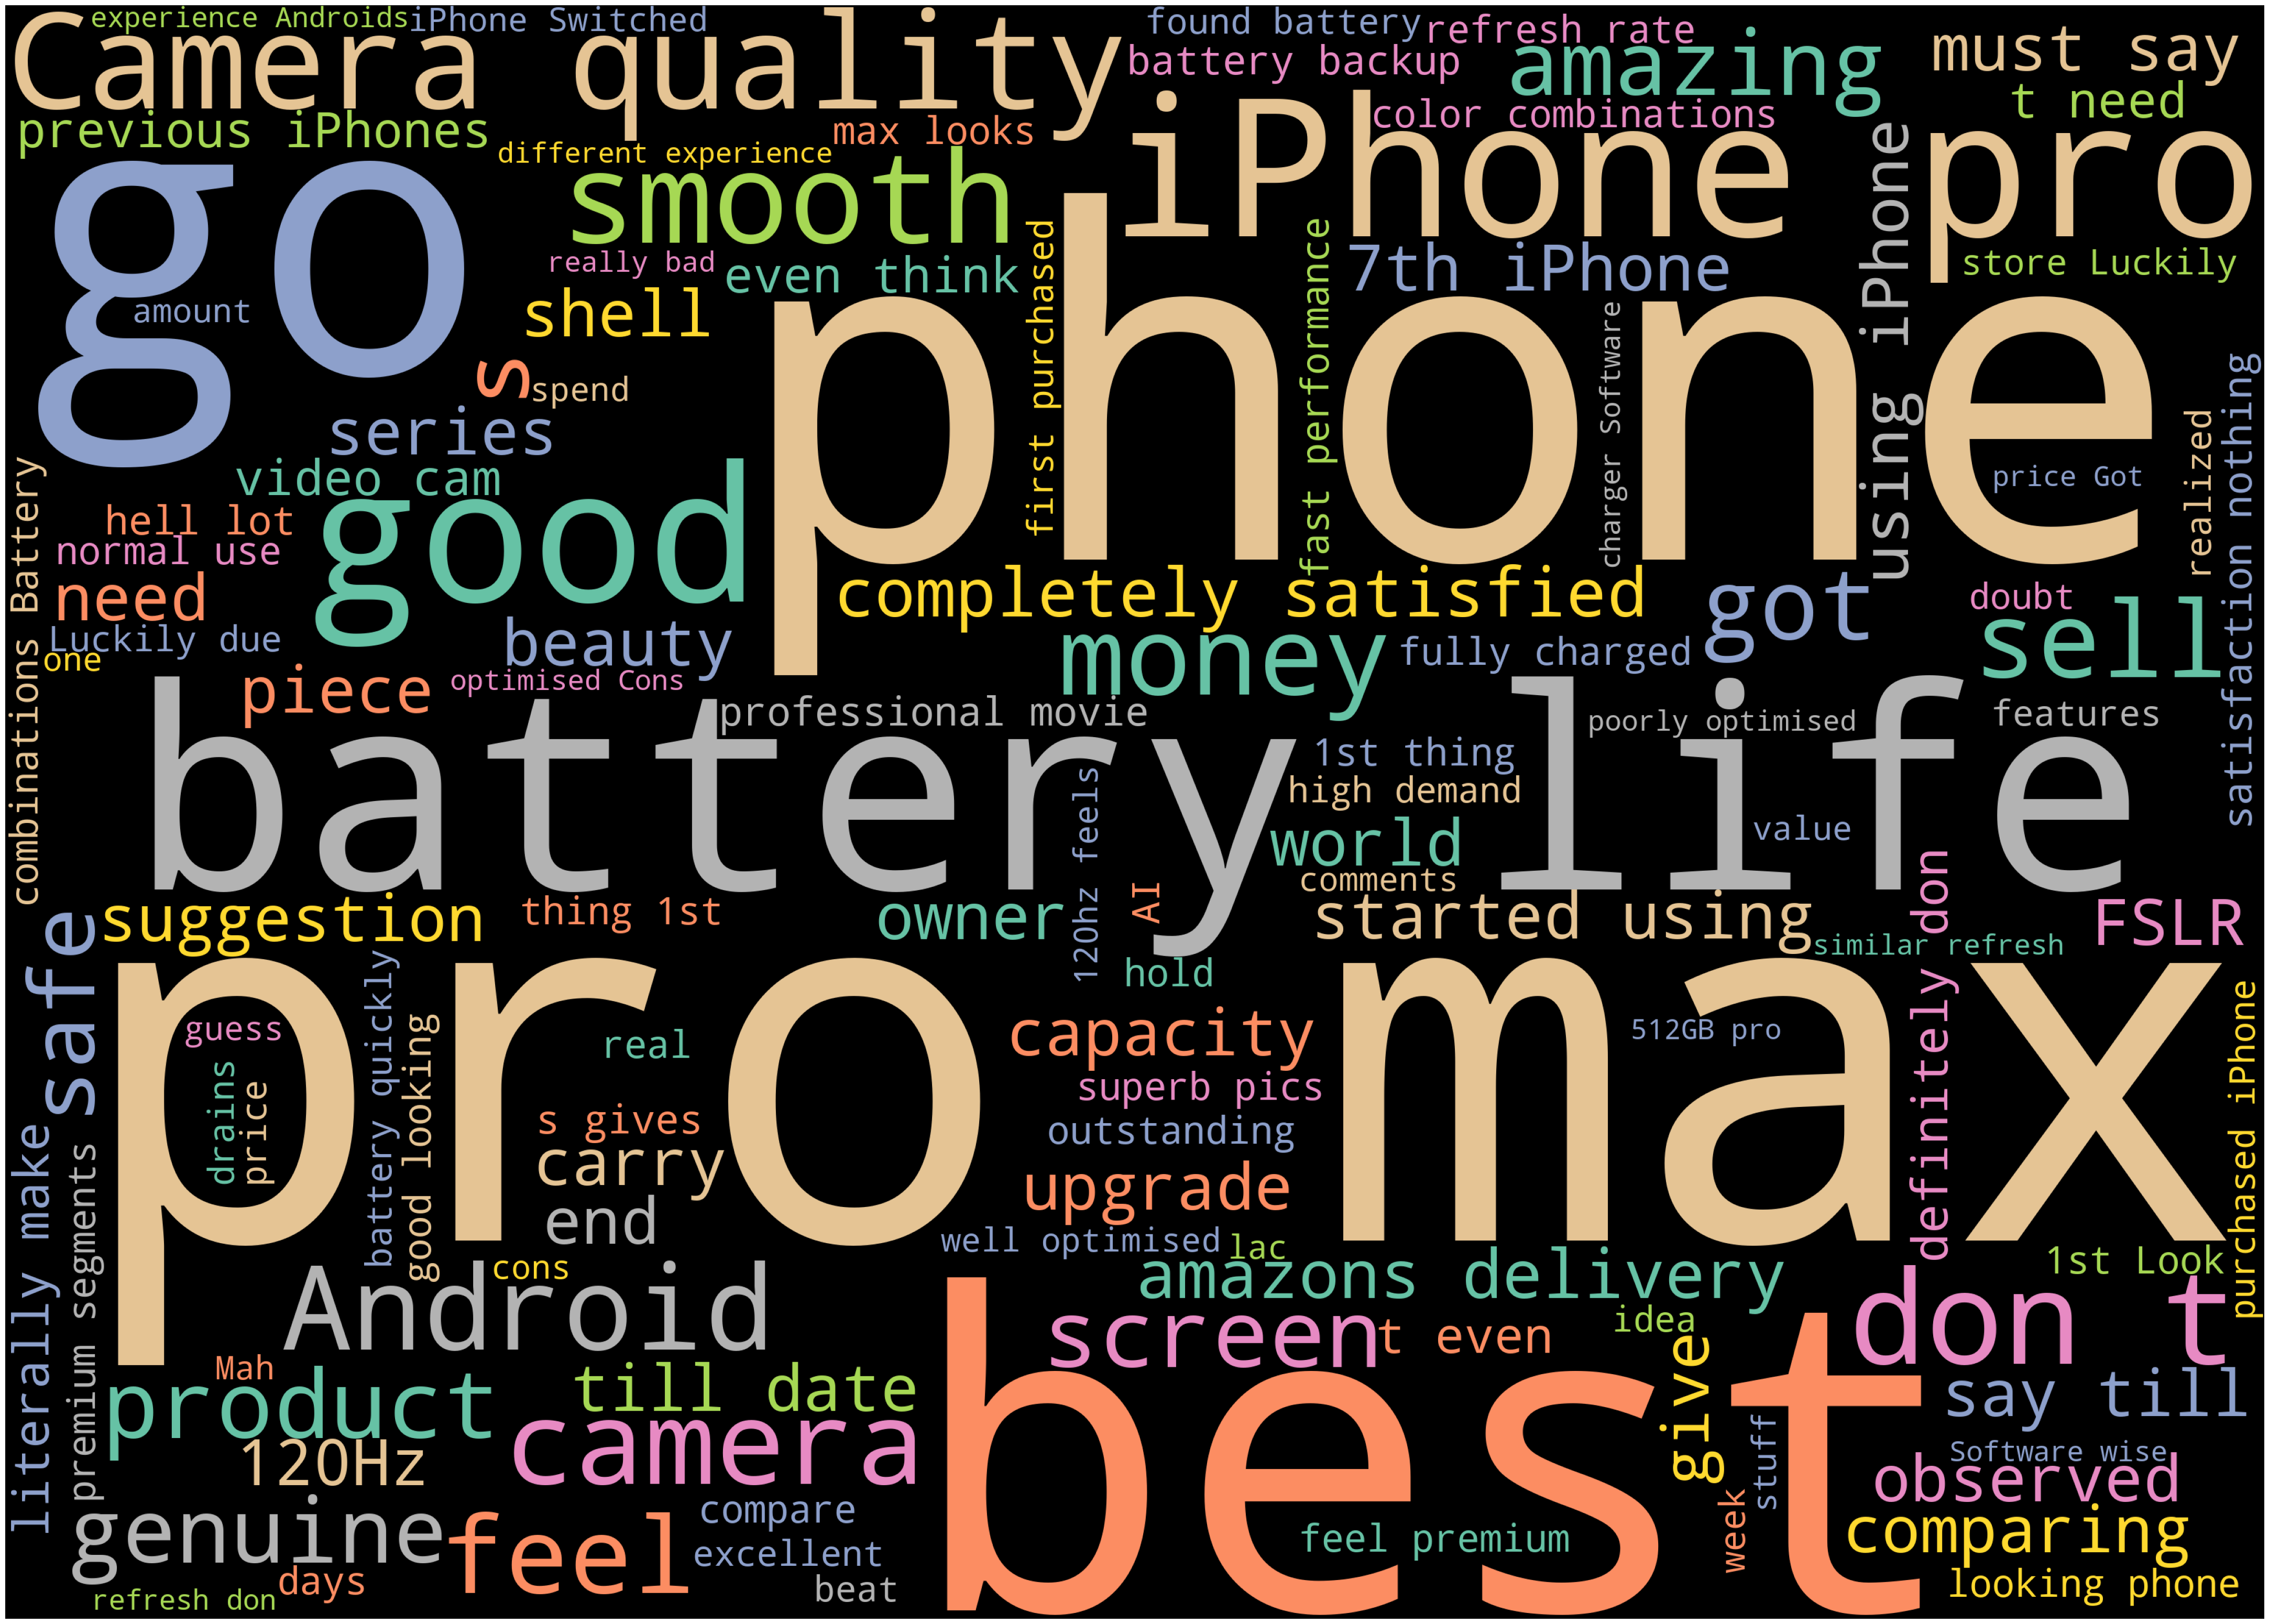

In [238]:
wordcloud = WordCloud(width = 3500,height = 2500,background_color='black',max_words=120,colormap='Set2').generate(df1)
plot_cloud(wordcloud)

In [239]:
df5=iphone13_reviews

In [240]:
df5

['\ni was completely satisfied with amazons delivery, it was safe. the phone is amazing\n',
 '\ni was completely satisfied with amazons delivery, it was safe. the phone is amazing\n',
 '\nI have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones. Camera quality you can’t even think of comparing it with any other phone in the world. You definitely don’t need to carry a FSLR or a video cam after you own this piece. You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it.\n',
 '\ni was completely satisfied with amazons delivery, it was safe. the phone is amazing\n',
 '\nI have started using iPhone 

### 11) Removing both leading and trailing characters along with empty strings

In [241]:
df5 = [x.strip() for x in df5] 
df5 = [x for x in df5 if x] 
df5[0:10]

['i was completely satisfied with amazons delivery, it was safe. the phone is amazing',
 'i was completely satisfied with amazons delivery, it was safe. the phone is amazing',
 'I have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones. Camera quality you can’t even think of comparing it with any other phone in the world. You definitely don’t need to carry a FSLR or a video cam after you own this piece. You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it.',
 'i was completely satisfied with amazons delivery, it was safe. the phone is amazing',
 'I have started using iPhone from 5 series and 

In [242]:
one1 = df5[1]
doc1 = nlp(one1)
spacy.displacy.render(doc1, style='ent', jupyter=True)

In [243]:
one1

'i was completely satisfied with amazons delivery, it was safe. the phone is amazing'

In [244]:
for token in doc1[:]:
    print(token, token.pos_)

i PRON
was AUX
completely ADV
satisfied ADJ
with ADP
amazons NOUN
delivery NOUN
, PUNCT
it PRON
was AUX
safe ADJ
. PUNCT
the DET
phone NOUN
is AUX
amazing ADJ


### 12) Lets Filter Nouns and Verbs

In [245]:
nv = [token.text for token in doc1 if token.pos_ in ('NOUN', 'VERB')]
nv

['amazons', 'delivery', 'phone']

In [246]:
cv = CountVectorizer()

In [247]:
x = cv.fit_transform(nv)

In [248]:
x

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [249]:
cv.get_feature_names_out()

array(['amazons', 'delivery', 'phone'], dtype=object)

In [250]:
df6 = pd.DataFrame(x.toarray(), columns = cv.get_feature_names_out())
df6

,amazons,delivery,phone
0,1,0,0
1,0,1,0
2,0,0,1


In [251]:
sum1 = x.sum(axis=0)

In [252]:
cv.vocabulary_

{'amazons': 0, 'delivery': 1, 'phone': 2}

In [253]:
df7 = pd.DataFrame({'word' : cv.get_feature_names_out(),'count' : np.array(sum1).flatten()})
df7

,word,count
0,amazons,1
1,delivery,1
2,phone,1


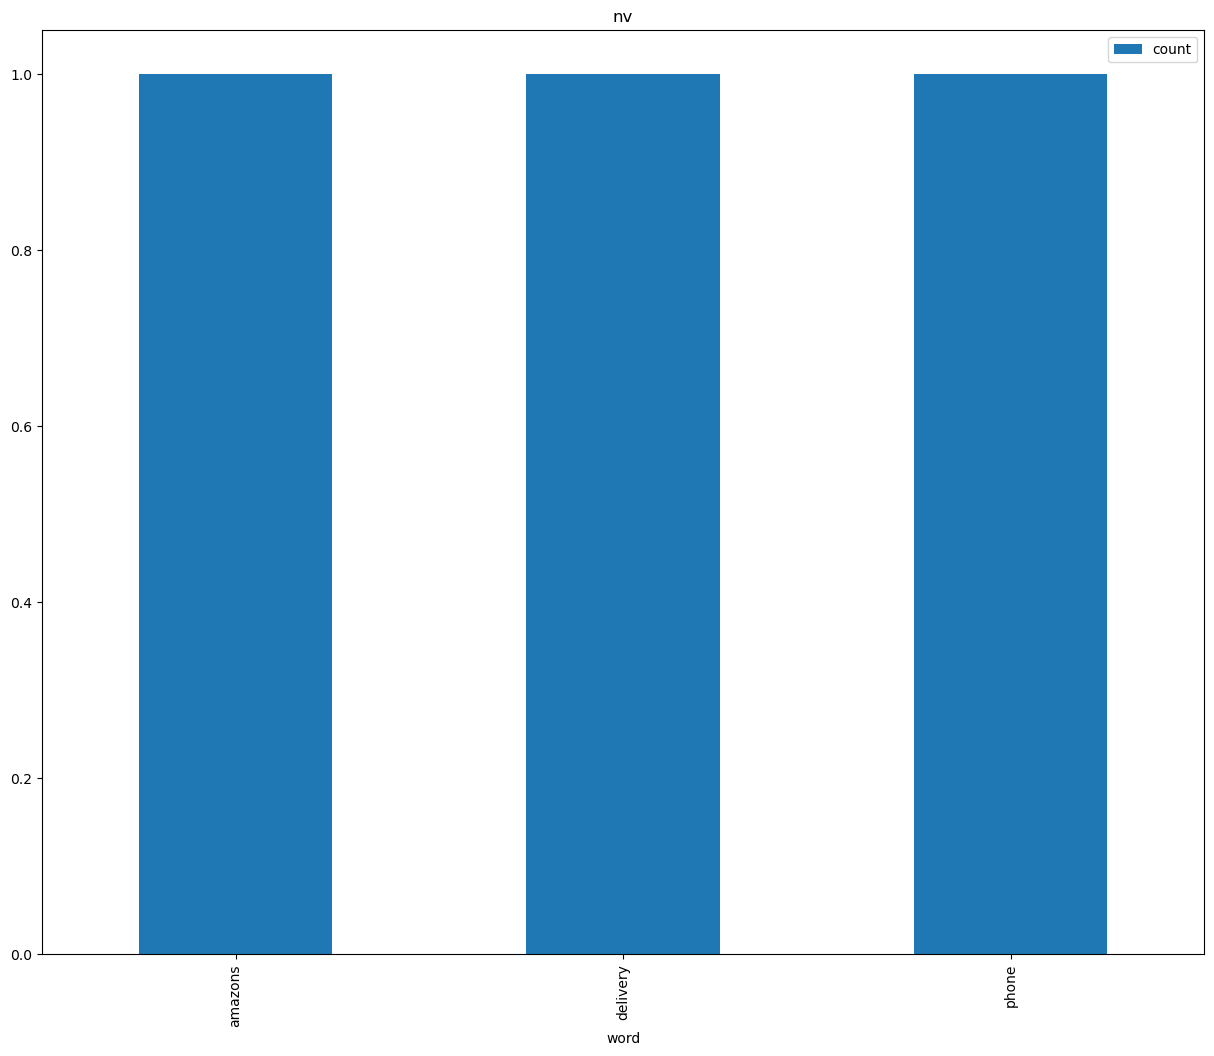

In [254]:
df7[0:15].plot.bar(x='word', figsize=(15,12), title='nv');

### 13) Lets Perform Sentiment Analysis

In [255]:
aff= pd.read_csv('afinn.csv',sep = ",",encoding = 'latin-1')
aff

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [256]:
df

['i was completely satisfied with amazons delivery, it was safe. the phone is amazing',
 'i was completely satisfied with amazons delivery, it was safe. the phone is amazing',
 'I have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones. Camera quality you can’t even think of comparing it with any other phone in the world. You definitely don’t need to carry a FSLR or a video cam after you own this piece. You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it.',
 'i was completely satisfied with amazons delivery, it was safe. the phone is amazing',
 'I have started using iPhone from 5 series and 

In [257]:
df8 = tokenize.sent_tokenize(" ".join(df5))

In [258]:
df8

['i was completely satisfied with amazons delivery, it was safe.',
 'the phone is amazing i was completely satisfied with amazons delivery, it was safe.',
 'the phone is amazing I have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones.',
 'Camera quality you can’t even think of comparing it with any other phone in the world.',
 'You definitely don’t need to carry a FSLR or a video cam after you own this piece.',
 'You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it.',
 'i was completely satisfied with amazons delivery, it was safe.',
 'the phone is amazing I have started using iPhone from 5

In [259]:
df9= pd.DataFrame(df8, columns=['sentence'])
df9

,sentence
0,i was completely satisfied with amazons delive...
1,the phone is amazing i was completely satisfie...
2,the phone is amazing I have started using iPho...
3,Camera quality you can’t even think of compari...
4,You definitely don’t need to carry a FSLR or a...
...,...
256,"Now, most importantly a genuine Apple iPhone 1..."
257,It works great for me and has a longer battery...
258,Would first like to tell that don’t listen to ...
259,Battery backup good but not good for gaming as...


In [260]:
affinity_scores = aff.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [261]:
nlp = spacy.load('en_core_web_sm')

In [262]:
sentiment_lexicon = affinity_scores

In [263]:
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) 
    return sent_score

#### Lets test it

In [264]:
calculate_sentiment(text = 'bad')

-3

In [265]:
calculate_sentiment(text = 'wonderful')

4

In [266]:
calculate_sentiment(text = 'good')

3

In [267]:
df9['sentiment_value'] = df9['sentence'].apply(calculate_sentiment)

In [268]:
df9

,sentence,sentiment_value
0,i was completely satisfied with amazons delive...,3
1,the phone is amazing i was completely satisfie...,7
2,the phone is amazing I have started using iPho...,7
3,Camera quality you can’t even think of compari...,0
4,You definitely don’t need to carry a FSLR or a...,0
...,...,...
256,"Now, most importantly a genuine Apple iPhone 1...",0
257,It works great for me and has a longer battery...,3
258,Would first like to tell that don’t listen to ...,5
259,Battery backup good but not good for gaming as...,8


In [269]:
df9['no_of_words'] = df9['sentence'].str.split().apply(len)

In [270]:
df9

,sentence,sentiment_value,no_of_words
0,i was completely satisfied with amazons delive...,3,10
1,the phone is amazing i was completely satisfie...,7,14
2,the phone is amazing I have started using iPho...,7,43
3,Camera quality you can’t even think of compari...,0,16
4,You definitely don’t need to carry a FSLR or a...,0,17
...,...,...,...
256,"Now, most importantly a genuine Apple iPhone 1...",0,15
257,It works great for me and has a longer battery...,3,18
258,Would first like to tell that don’t listen to ...,5,65
259,Battery backup good but not good for gaming as...,8,62


In [271]:
df9.sort_values(by='sentiment_value')

,sentence,sentiment_value,no_of_words
198,"With no charger!2) Software wise, the notifica...",-4,10
55,"With no charger!2) Software wise, the notifica...",-4,10
156,"With no charger!2) Software wise, the notifica...",-4,10
81,"With no charger!2) Software wise, the notifica...",-4,10
115,"With no charger!2) Software wise, the notifica...",-4,10
...,...,...,...
59,the phone is amazing I have started using iPho...,7,43
33,the phone is amazing I have started using iPho...,7,43
93,the phone is amazing I have started using iPho...,7,43
259,Battery backup good but not good for gaming as...,8,62


### 14) Lets look at the sentiment score

In [272]:
df9[df9['sentiment_value']<=0].head()

,sentence,sentiment_value,no_of_words
3,Camera quality you can’t even think of compari...,0,16
4,You definitely don’t need to carry a FSLR or a...,0,17
5,You can literally make a professional movie fr...,-1,63
8,Camera quality you can’t even think of compari...,0,16
9,You definitely don’t need to carry a FSLR or a...,0,17


In [273]:
df9[df9['sentiment_value']<=0].head()['sentence'].tolist()

['Camera quality you can’t even think of comparing it with any other phone in the world.',
 'You definitely don’t need to carry a FSLR or a video cam after you own this piece.',
 'You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it.',
 'Camera quality you can’t even think of comparing it with any other phone in the world.',
 'You definitely don’t need to carry a FSLR or a video cam after you own this piece.']

In [274]:
import seaborn as sns

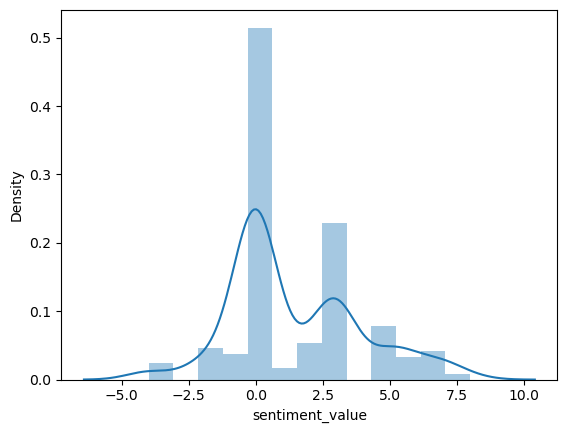

In [275]:
sns.distplot(df9['sentiment_value']);

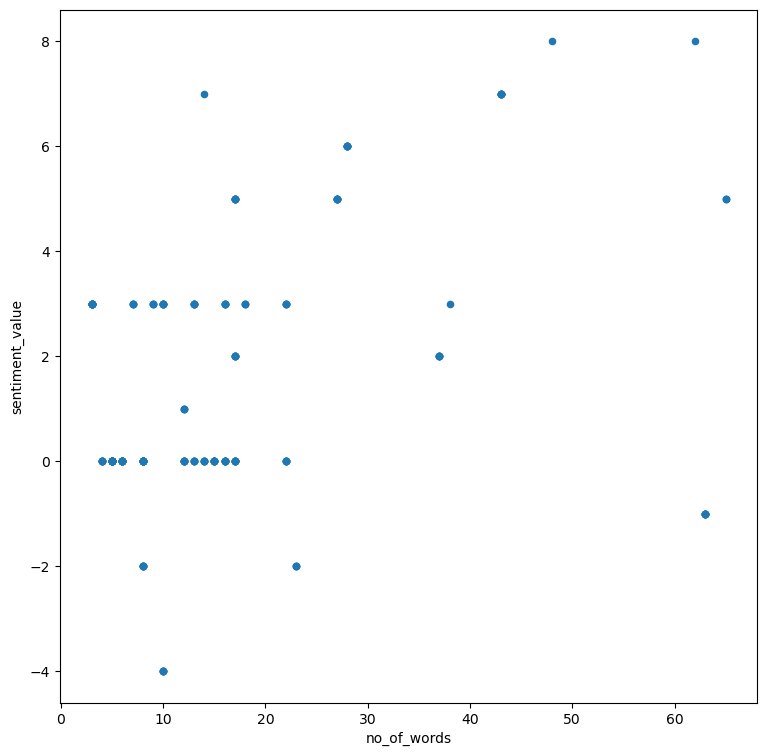

In [276]:
df9.plot.scatter(x='no_of_words',y='sentiment_value',figsize=(9,9));

In [277]:
pw=pd.read_csv('positive-words.txt',on_bad_lines='skip')
pw

,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Positive
2,;
3,; This file contains a list of POSITIVE opinio...
4,;
...,...
2026,youthful
2027,zeal
2028,zenith
2029,zest


In [278]:
pw=pw.iloc[25:]
pw =pw.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
pw.reset_index(inplace=True)
pw =pw.drop('index',axis=1)
pw['Score'] = 1
pw

,Words,Score
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
2001,youthful,1
2002,zeal,1
2003,zenith,1
2004,zest,1


In [279]:
nw=pd.read_csv('negative-words.txt',encoding='latin-1',on_bad_lines='skip')
nw

,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
...,...
4803,zaps
4804,zealot
4805,zealous
4806,zealously


In [280]:
nw = nw.iloc[25:]
nw = nw.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
nw.reset_index(inplace=True)
nw = nw.drop('index',axis=1)
nw['Score'] = -1
nw

,Words,Score
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4778,zaps,-1
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1


In [281]:
affinity_scores1 = pw.set_index('Words')['Score'].to_dict()
affinity_scores2 = nw.set_index('Words')['Score'].to_dict()
affinity_scores1.update(affinity_scores2)
affinity_scores = affinity_scores1
affinity_scores

{'a+': 1,
 'abound': 1,
 'abounds': 1,
 'abundance': 1,
 'abundant': 1,
 'accessable': 1,
 'accessible': 1,
 'acclaim': 1,
 'acclaimed': 1,
 'acclamation': 1,
 'accolade': 1,
 'accolades': 1,
 'accommodative': 1,
 'accomodative': 1,
 'accomplish': 1,
 'accomplished': 1,
 'accomplishment': 1,
 'accomplishments': 1,
 'accurate': 1,
 'accurately': 1,
 'achievable': 1,
 'achievement': 1,
 'achievements': 1,
 'achievible': 1,
 'acumen': 1,
 'adaptable': 1,
 'adaptive': 1,
 'adequate': 1,
 'adjustable': 1,
 'admirable': 1,
 'admirably': 1,
 'admiration': 1,
 'admire': 1,
 'admirer': 1,
 'admiring': 1,
 'admiringly': 1,
 'adorable': 1,
 'adore': 1,
 'adored': 1,
 'adorer': 1,
 'adoring': 1,
 'adoringly': 1,
 'adroit': 1,
 'adroitly': 1,
 'adulate': 1,
 'adulation': 1,
 'adulatory': 1,
 'advanced': 1,
 'advantage': 1,
 'advantageous': 1,
 'advantageously': 1,
 'advantages': 1,
 'adventuresome': 1,
 'adventurous': 1,
 'advocate': 1,
 'advocated': 1,
 'advocates': 1,
 'affability': 1,
 'affable'

In [282]:
sentiment_lexicon = affinity_scores

In [283]:
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [284]:
df9['sentiment_value'] = df9['sentence'].apply(calculate_sentiment)

In [285]:
df9

,sentence,sentiment_value,no_of_words
0,i was completely satisfied with amazons delive...,2,10
1,the phone is amazing i was completely satisfie...,3,14
2,the phone is amazing I have started using iPho...,2,43
3,Camera quality you can’t even think of compari...,0,16
4,You definitely don’t need to carry a FSLR or a...,0,17
...,...,...,...
256,"Now, most importantly a genuine Apple iPhone 1...",1,15
257,It works great for me and has a longer battery...,2,18
258,Would first like to tell that don’t listen to ...,3,65
259,Battery backup good but not good for gaming as...,3,62


In [286]:
df9['no_of_words'] = df9['sentence'].str.split().apply(len)

In [287]:
df9

,sentence,sentiment_value,no_of_words
0,i was completely satisfied with amazons delive...,2,10
1,the phone is amazing i was completely satisfie...,3,14
2,the phone is amazing I have started using iPho...,2,43
3,Camera quality you can’t even think of compari...,0,16
4,You definitely don’t need to carry a FSLR or a...,0,17
...,...,...,...
256,"Now, most importantly a genuine Apple iPhone 1...",1,15
257,It works great for me and has a longer battery...,2,18
258,Would first like to tell that don’t listen to ...,3,65
259,Battery backup good but not good for gaming as...,3,62


In [288]:
df9.sort_values(by='sentiment_value').head()

,sentence,sentiment_value,no_of_words
143,I first purchased iPhone 14 pro then I realize...,-1,22
158,"Also, it’s really tricky to transfer Whatsapp ...",-1,13
57,"Also, it’s really tricky to transfer Whatsapp ...",-1,13
242,"Also, it’s really tricky to transfer Whatsapp ...",-1,13
42,I first purchased iPhone 14 pro then I realize...,-1,22


In [289]:
df9['sentiment_value'].describe()

count    261.000000
mean       0.739464
std        1.041972
min       -1.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: sentiment_value, dtype: float64

In [290]:
df9[df9['sentiment_value']<0].head()

,sentence,sentiment_value,no_of_words
26,I first purchased iPhone 14 pro then I realize...,-1,22
31,No doubt about other features of the iPhone.,-1,8
42,I first purchased iPhone 14 pro then I realize...,-1,22
47,No doubt about other features of the iPhone.,-1,8
57,"Also, it’s really tricky to transfer Whatsapp ...",-1,13


In [291]:
df9[df9['sentiment_value']<=-1].head(10)['sentence']

26     I first purchased iPhone 14 pro then I realize...
31          No doubt about other features of the iPhone.
42     I first purchased iPhone 14 pro then I realize...
47          No doubt about other features of the iPhone.
57     Also, it’s really tricky to transfer Whatsapp ...
68     I first purchased iPhone 14 pro then I realize...
73          No doubt about other features of the iPhone.
83     Also, it’s really tricky to transfer Whatsapp ...
102    I first purchased iPhone 14 pro then I realize...
107         No doubt about other features of the iPhone.
Name: sentence, dtype: object

In [292]:
df9['index'] = range(0, len(df9))

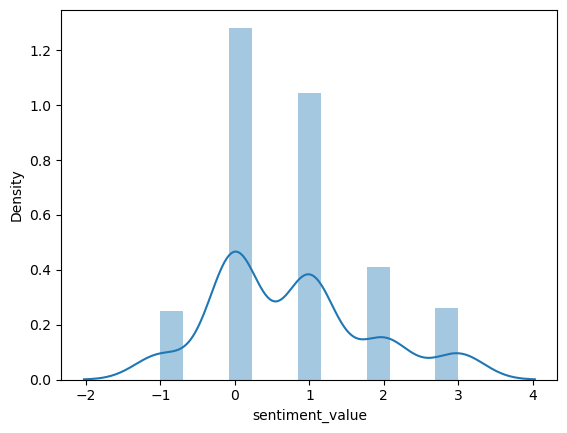

In [293]:
sns.distplot(df9['sentiment_value']);

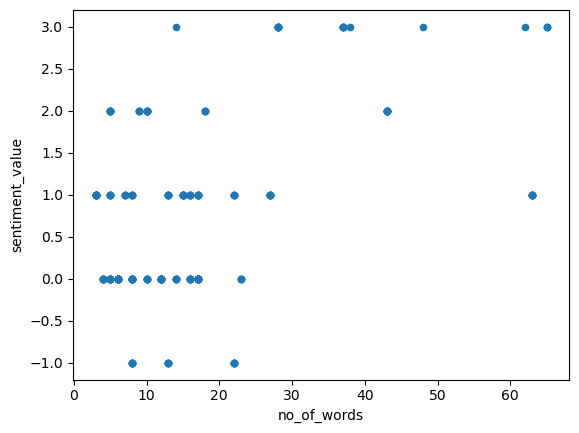

In [294]:
df9.plot.scatter(x='no_of_words',y='sentiment_value');

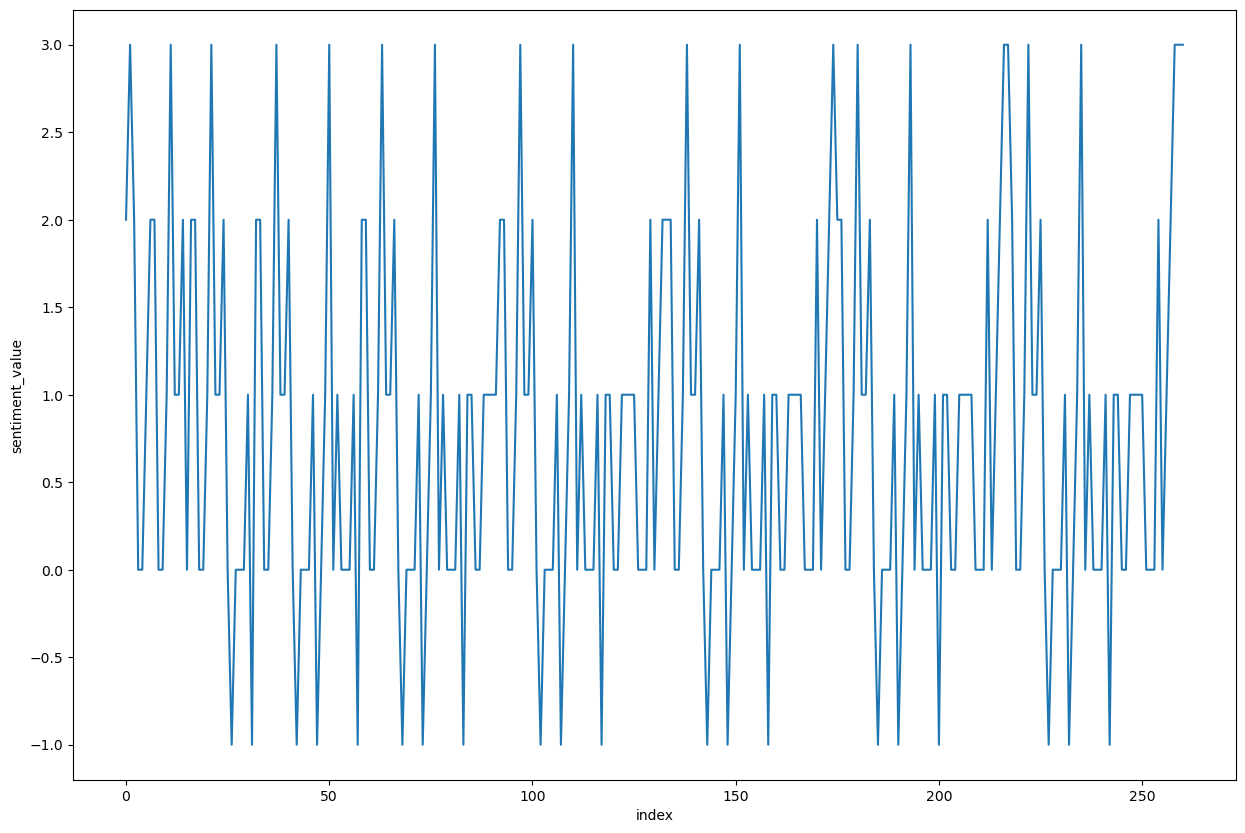

In [295]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=df9);